In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
data_path = "../data/processed/processed_data-valencia_barcelona.csv"
df = pd.read_csv(data_path)
print(df.head())

          ID                                             Título  \
0  106061040  Ático en calle de València, La Dreta de l'Eixa...   
1  105435068  Piso en calle del Rosselló, La Dreta de l'Eixa...   
2  102772221  Piso en calle de Provença, La Dreta de l'Eixam...   
3  105075436  Piso en plaza Tetuan, La Dreta de l'Eixample, ...   
4  103305568  Casa o chalet independiente en calle de Benede...   

                                          Enlace  \
0  https://www.idealista.com/inmueble/106061040/   
1  https://www.idealista.com/inmueble/105435068/   
2  https://www.idealista.com/inmueble/102772221/   
3  https://www.idealista.com/inmueble/105075436/   
4  https://www.idealista.com/inmueble/103305568/   

                                         Descripción      city    price  \
0  Ático de 79 m² construidos, situado en un edif...  valencia   650000   
1  Este impecable piso se sitúa entre Paseo de Gr...  valencia  1800000   
2  Espectacular y amplio Principal con terraza en...  valen

In [17]:
# Eliminar filas con valores nulos en las columnas
df = df.dropna(subset=['price', 'rooms', 'meters', 'Elevator', 'Floor'])

# Convertir columnas necesarias
df['Elevator'] = df['Elevator'].astype(int)  # Convertir True/False a 1/0
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')
df['city_encoded'] = df['city'].map({'barcelona': 1, 'valencia': 0})  # Codificar ciudades como 1 (Barcelona) y 0 (Valencia)

#Verificar datos
print(df.head())

          ID                                             Título  \
0  106061040  Ático en calle de València, La Dreta de l'Eixa...   
1  105435068  Piso en calle del Rosselló, La Dreta de l'Eixa...   
2  102772221  Piso en calle de Provença, La Dreta de l'Eixam...   
3  105075436  Piso en plaza Tetuan, La Dreta de l'Eixample, ...   
5  106627368           Piso en calle Ample, El Gòtic, Barcelona   

                                          Enlace  \
0  https://www.idealista.com/inmueble/106061040/   
1  https://www.idealista.com/inmueble/105435068/   
2  https://www.idealista.com/inmueble/102772221/   
3  https://www.idealista.com/inmueble/105075436/   
5  https://www.idealista.com/inmueble/106627368/   

                                         Descripción      city    price  \
0  Ático de 79 m² construidos, situado en un edif...  valencia   650000   
1  Este impecable piso se sitúa entre Paseo de Gr...  valencia  1800000   
2  Espectacular y amplio Principal con terraza en...  valen

In [18]:
# Se seleccionan las columnas
features = ['rooms', 'meters', 'Floor', 'Elevator', 'city_encoded']
target = 'price'

X = df[features]
y = df[target]

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [22]:
# Modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predicción y evaluación
y_pred = reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nResultados del Modelo Supervisado: ")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


Resultados del Modelo Supervisado: 
RMSE: 628578.61
R²: 0.42


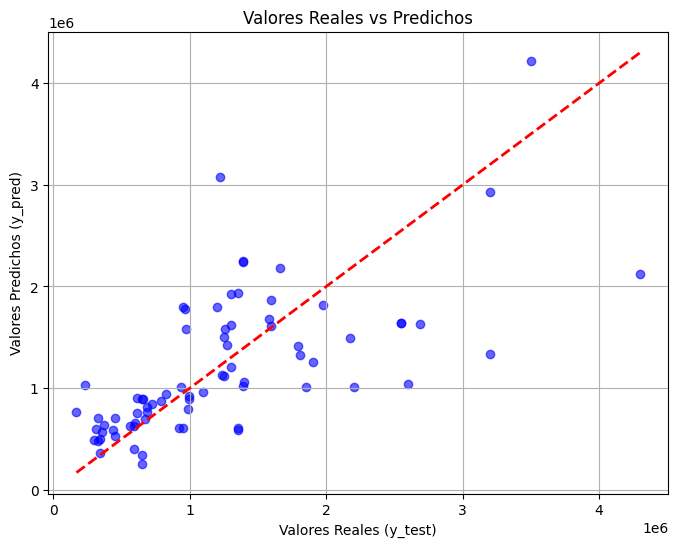

In [20]:
# Gráfico de valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2,)
plt.title("Valores Reales vs Predichos")
plt.xlabel("Valores Reales (y_test)")
plt.ylabel("Valores Predichos (y_pred)")
plt.grid()
plt.show()

In [21]:
# Datos de la propiedad para predecir
input_data = {
    'rooms': 2,       # Número de habitaciones
    'meters': 45,    # Metros cuadrados
    'Floor': 1,       # Piso
    'Elevator': 1,    # 1 si tiene ascensor, 0 si no
    'city_encoded': 0 # 1 para Barcelona, 0 para Valencia
}

# Convertir el diccionario en un DataFrame
input_df = pd.DataFrame([input_data])

# Escalar las características
input_scaled = scaler.transform(input_df)

# Predicción
predicted_price = reg_model.predict(input_scaled)
print(f"El precio estimado para la propiedad es: {predicted_price[0]:,.2f} €")

El precio estimado para la propiedad es: 145,382.94 €
